# Datawrangling, exploration and visualization

In [1]:
import pandas as pd
# Set pandas options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
# Set pandas option to display the full content of each column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)


## Load data from database

In [2]:
import pandas as pd
import mysql.connector

# Replace the following details with your actual credentials
host = 'localhost'
user = 'root'
password = '1234'
database = 'bolig'

# Establish a connection to the MySQL database
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Define the SQL query
sql_query = '''
SELECT
    id,
    postnr,
    kommuneinddelingKommunekode as kommunekode,
    kommunenavn,
    wgs84koordinat_bredde as koordinat_bredde,
    wgs84koordinat_længde as koordinat_længde,
    enh026EnhedensSamledeAreal as samlede_areal,
    enh027ArealTilBeboelse as beboelses_areal,
    enh031AntalVærelser as værelser,
    enh065AntalVandskylledeToiletter as toiletter,
    enh066AntalBadeværelser as badeværelser,
    Ejendomstype,
    vurdering,
    salgspris,
    adresse
FROM housing_sample10
ORDER BY kommuneinddelingKommunekode, postnr;
'''

# Load the query results into a pandas DataFrame
housing_data = pd.read_sql(sql_query, connection)

# Close the database connection
connection.close()

# Display the DataFrame
display(housing_data)
print(len(housing_data))

C:\Users\viet-intel\AppData\Local\Temp\ipykernel_21788\898542543.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  housing_data = pd.read_sql(sql_query, connection)


,id,postnr,kommunekode,kommunenavn,koordinat_bredde,koordinat_længde,samlede_areal,beboelses_areal,værelser,toiletter,badeværelser,Ejendomstype,vurdering,salgspris,adresse
0,0a3f509f-4090-32b8-e044-0003ba298018,1050,0101,København,55.68,12.58,85.00,42.00,3.00,1.00,1.00,Ejerlejlighed,2050000.00,NaN,"Kongens Nytorv 21, 4. th, 1050 København K"
1,0a3f509f-4090-32b8-e044-0003ba298018,1050,0101,København,55.68,12.58,NaN,NaN,NaN,NaN,NaN,Ejerlejlighed,2050000.00,NaN,"Kongens Nytorv 21, 4. th, 1050 København K"
2,0a3f509f-4090-32b8-e044-0003ba298018,1050,0101,København,55.68,12.58,85.00,42.00,3.00,1.00,1.00,Ejerlejlighed,NaN,NaN,"Kongens Nytorv 21, 4. th, 1050 København K"
3,0a3f509f-4090-32b8-e044-0003ba298018,1050,0101,København,55.68,12.58,NaN,NaN,NaN,NaN,NaN,Ejerlejlighed,NaN,NaN,"Kongens Nytorv 21, 4. th, 1050 København K"
4,0a3f509f-4074-32b8-e044-0003ba298018,1050,0101,København,55.68,12.58,336.00,NaN,6.00,5.00,1.00,Ejerlejlighed,19800000.00,27000000.00,"Kongens Nytorv 19, st., 1050 København K"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88386,51af2cd1-24fa-4c9d-b570-bd3a29dba94e,3300,0270,Gribskov,56.02,12.08,78.00,78.00,3.00,1.00,1.00,Ejerlejlighed,NaN,NaN,"Frederiksværkvej 160, st. 2, Ramløse Sand, 3300 Frederiksværk"
88387,66a3772d-f716-441a-9f38-04f7aaef8fb7,3300,0270,Gribskov,56.02,12.08,84.00,84.00,3.00,1.00,1.00,Ejerlejlighed,NaN,NaN,"Frederiksværkvej 160, st. 4, Ramløse Sand, 3300 Frederiksværk"
88388,1ee898eb-eab9-468f-bbc4-d4514172e736,3300,0270,Gribskov,56.02,12.08,84.00,84.00,3.00,1.00,1.00,Ejerlejlighed,NaN,NaN,"Frederiksværkvej 160, st. 3, Ramløse Sand, 3300 Frederiksværk"
88389,5886d7a7-3c4d-42d2-a091-c29f397a8101,3300,0270,Gribskov,56.02,12.08,103.00,96.00,4.00,2.00,1.00,Ejerlejlighed,NaN,NaN,"Frederiksværkvej 160, 1. 10, Ramløse Sand, 3300 Frederiksværk"


88391


## Data exploration

In [3]:
# Quick look at the data 
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88391 entries, 0 to 88390
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                88391 non-null  object 
 1   postnr            88391 non-null  int64  
 2   kommunekode       88391 non-null  object 
 3   kommunenavn       88391 non-null  object 
 4   koordinat_bredde  88391 non-null  float64
 5   koordinat_længde  88391 non-null  float64
 6   samlede_areal     82599 non-null  float64
 7   beboelses_areal   76002 non-null  float64
 8   værelser          81949 non-null  float64
 9   toiletter         78548 non-null  float64
 10  badeværelser      76217 non-null  float64
 11  Ejendomstype      88391 non-null  object 
 12  vurdering         68868 non-null  float64
 13  salgspris         52692 non-null  float64
 14  adresse           87169 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 10.1+ MB


In [6]:
housing_data['salgspris'] = housing_data['salgspris'].astype(str).str.replace('.', '').astype(float)


C:\Users\viet-intel\AppData\Local\Temp\ipykernel_21788\365097059.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  housing_data['salgspris'] = housing_data['salgspris'].astype(str).str.replace('.', '').astype(float)


In [7]:
# Convert postnr to string
print(housing_data['postnr'].dtype)
housing_data['postnr'] = housing_data['postnr'].astype(str)
print(housing_data['postnr'].str.len())

int64
0        4
1        4
2        4
3        4
4        4
        ..
88386    4
88387    4
88388    4
88389    4
88390    4
Name: postnr, Length: 88391, dtype: int64


In [8]:
# describe() method to get a quick overview of the data
housing_data.describe()

,koordinat_bredde,koordinat_længde,samlede_areal,beboelses_areal,værelser,toiletter,badeværelser,vurdering,salgspris
count,88391.00,88391.00,82599.00,76002.00,81949.00,78548.00,76217.00,68868.00,52692.00
mean,55.72,12.52,113.46,85.60,2.87,1.16,1.08,2907950.36,60974702.72
std,0.09,0.10,528.05,44.60,3.24,1.40,0.91,14984236.83,630770631.93
min,55.57,11.90,-6041.00,-1019.00,-38.00,-36.00,-7.00,1800.00,10.00
25%,55.66,12.50,60.00,61.00,2.00,1.00,1.00,930000.00,14000000.00
50%,55.68,12.54,81.00,81.00,3.00,1.00,1.00,1400000.00,23500000.00
75%,55.72,12.58,104.00,102.00,4.00,1.00,1.00,2250000.00,39000000.00
max,56.13,12.67,51028.00,4478.00,400.00,99.00,99.00,1178000000.00,74038400000.00


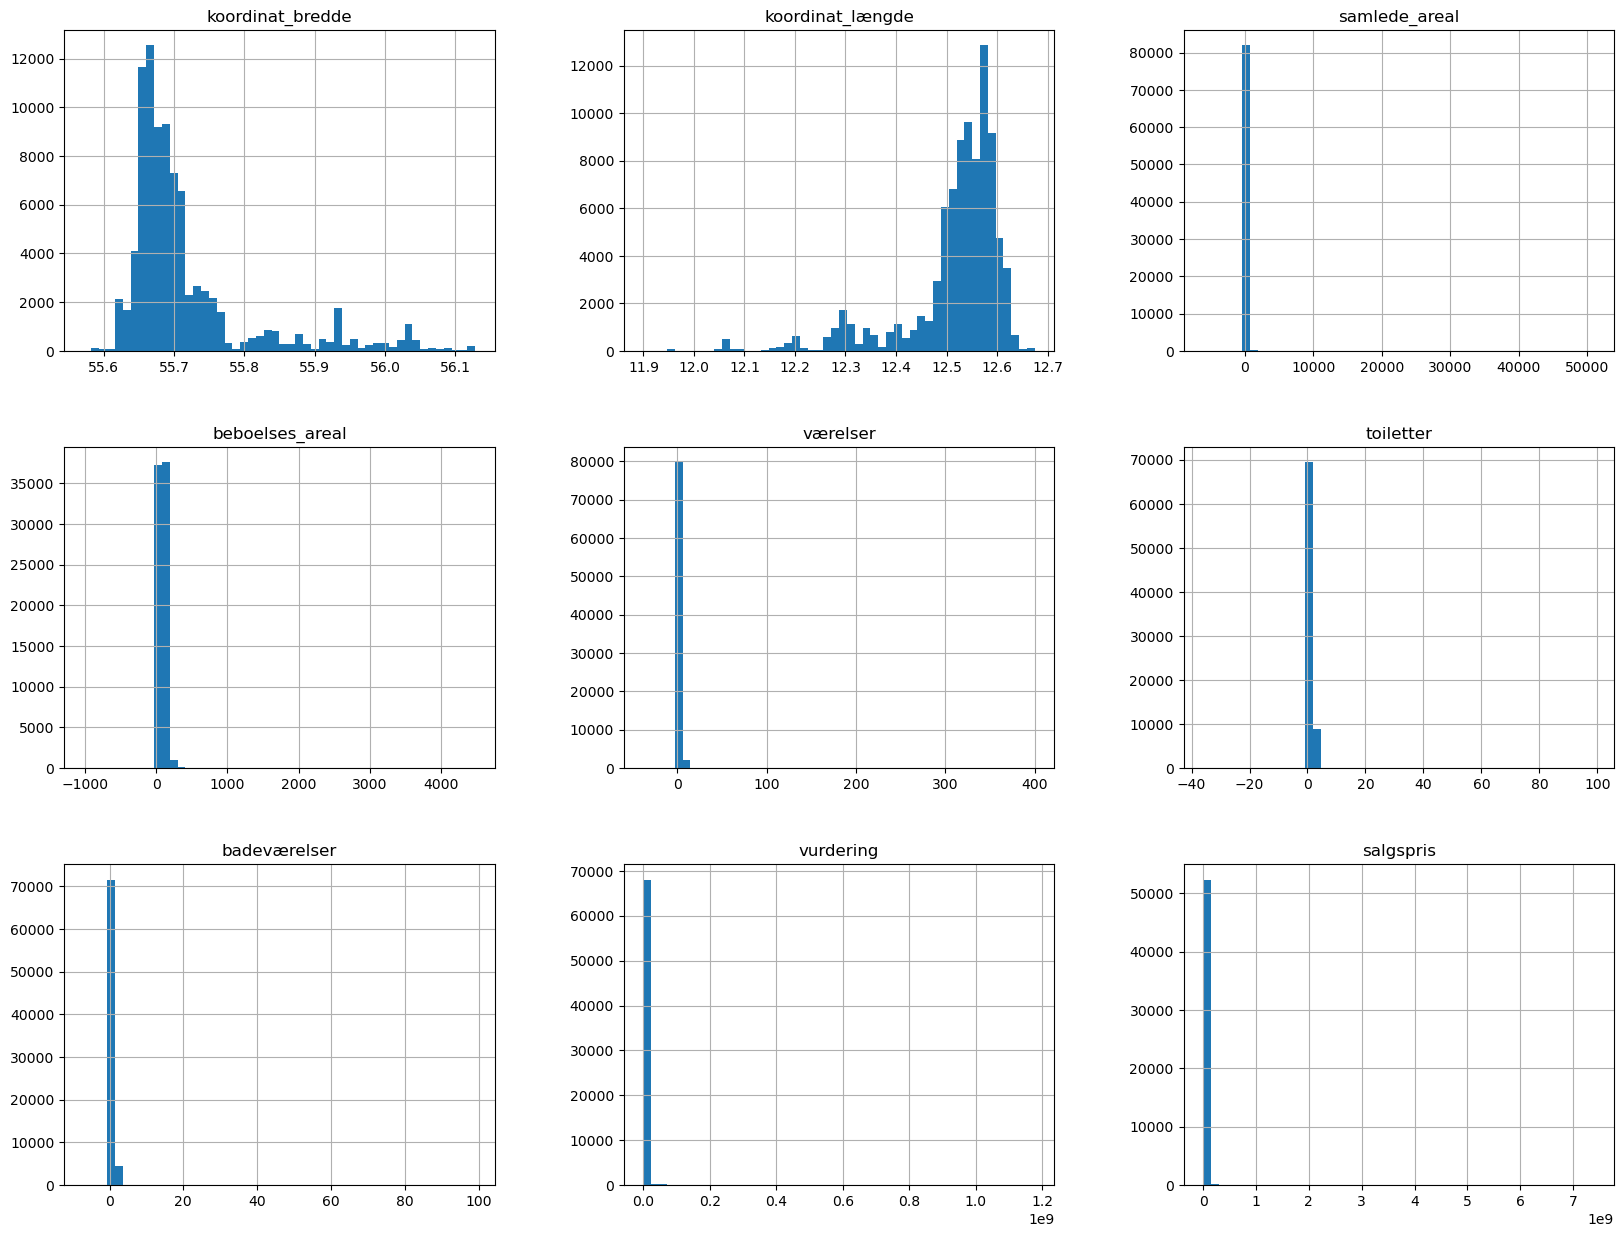

In [ ]:
# Plot a histogram for each numerical attribute

%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()




In [9]:
# Iterate over each column and count the number of values under 0
for column in housing_data.columns:
    try:
        count_under_zero = (housing_data[column] < 0).sum()
        print(f"Count of values under 0 in column '{column}': {count_under_zero}")
    except TypeError:
        print(f"Ignoring error in column '{column}' - Cannot compare str with int")


Ignoring error in column 'id' - Cannot compare str with int
Ignoring error in column 'postnr' - Cannot compare str with int
Ignoring error in column 'kommunekode' - Cannot compare str with int
Ignoring error in column 'kommunenavn' - Cannot compare str with int
Count of values under 0 in column 'koordinat_bredde': 0
Count of values under 0 in column 'koordinat_længde': 0
Count of values under 0 in column 'samlede_areal': 242
Count of values under 0 in column 'beboelses_areal': 124
Count of values under 0 in column 'værelser': 408
Count of values under 0 in column 'toiletter': 79
Count of values under 0 in column 'badeværelser': 37
Ignoring error in column 'Ejendomstype' - Cannot compare str with int
Count of values under 0 in column 'vurdering': 0
Count of values under 0 in column 'salgspris': 0
Ignoring error in column 'adresse' - Cannot compare str with int


In [10]:

# Convert numeric columns to appropriate data types (e.g., int or float)
numeric_columns = ['samlede_areal', 'beboelses_areal', 'værelser', 'toiletter', 'badeværelser', 'vurdering', 'salgspris']
housing_data[numeric_columns] = housing_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filter the DataFrame to remove rows with values under 0
housing_delimited = housing_data[
    (housing_data[numeric_columns] >= 0).all(axis=1)
]

# Display the filtered DataFrame 'housing_delimited'
display(housing_delimited.head(5))


,id,postnr,kommunekode,kommunenavn,koordinat_bredde,koordinat_længde,samlede_areal,beboelses_areal,værelser,toiletter,badeværelser,Ejendomstype,vurdering,salgspris,adresse
12,cc776fa9-a1bc-4eab-82d1-087697686801,1051,0101,København,55.68,12.59,76.00,76.00,2.00,1.00,1.00,Ejerlejlighed,2200000.00,62500000.00,"Nyhavn 31E, 3. 3, 1051 København K"
13,cc776fa9-a1bc-4eab-82d1-087697686801,1051,0101,København,55.68,12.59,78.00,78.00,2.00,1.00,1.00,Ejerlejlighed,2200000.00,62500000.00,"Nyhavn 31E, 3. 3, 1051 København K"
20,0a3f509f-de6e-32b8-e044-0003ba298018,1051,0101,København,55.68,12.59,193.00,193.00,8.00,1.00,1.00,Ejerlejlighed,5100000.00,117500000.00,"Nyhavn 12, 3., 1051 København K"
25,d60571ee-c3f7-40fd-88f8-95089174021f,1051,0101,København,55.68,12.59,85.00,85.00,2.00,1.00,1.00,Ejerlejlighed,2300000.00,28900000.00,"Nyhavn 31M, st., 1051 København K"
29,0a3f509f-de79-32b8-e044-0003ba298018,1051,0101,København,55.68,12.59,152.00,152.00,3.00,2.00,2.00,Ejerlejlighed,4950000.00,53000000.00,"Nyhavn 14, 2., 1051 København K"


In [11]:
# print null values in each column
housing_delimited.isnull().sum()

id                  0
postnr              0
kommunekode         0
kommunenavn         0
koordinat_bredde    0
koordinat_længde    0
samlede_areal       0
beboelses_areal     0
værelser            0
toiletter           0
badeværelser        0
Ejendomstype        0
vurdering           0
salgspris           0
adresse             0
dtype: int64

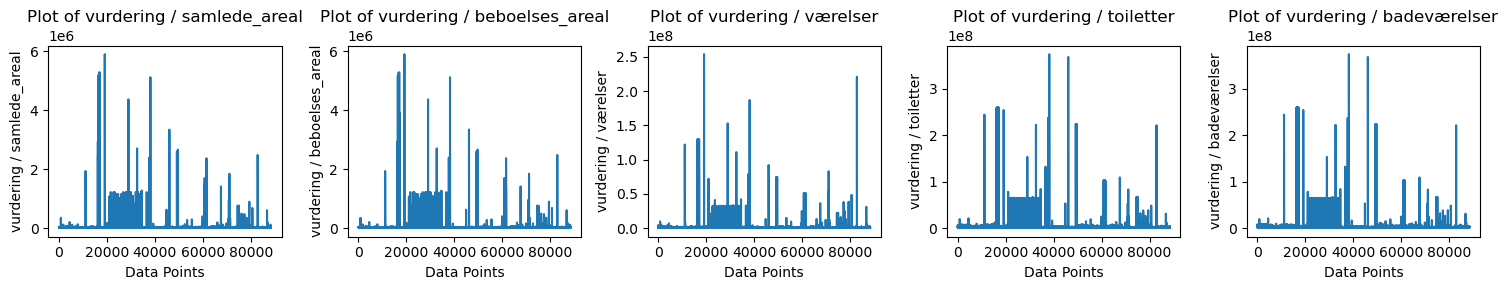

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert numeric columns to appropriate data types (e.g., int or float)
numeric_columns = ['samlede_areal', 'beboelses_areal', 'værelser', 'toiletter', 'badeværelser']
housing_data[numeric_columns] = housing_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filter out rows with values under 0 and rows with null (NaN) values in any column
housing_delimited = housing_data.dropna().loc[
    (housing_data[numeric_columns] >= 0).all(axis=1)
]

# Create subplots for each numeric column
num_plots = len(numeric_columns)
fig, axs = plt.subplots(1, num_plots, figsize=(num_plots * 3, 3))

# Loop through each numeric column, perform the division, and plot the data
for i, column in enumerate(numeric_columns):
    # Perform the division of 'vurdering' by the current column using NumPy arrays
    division_result = housing_delimited['vurdering'] / housing_delimited[column]
    
    # Plot the values in the corresponding subplot
    axs[i].plot(division_result)
    
    # Add labels and title for the subplot
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel(f'vurdering / {column}')
    axs[i].set_title(f'Plot of vurdering / {column}')

# Adjust the layout to prevent overlapping labels and titles
plt.tight_layout()

# Display all the plots
plt.show()


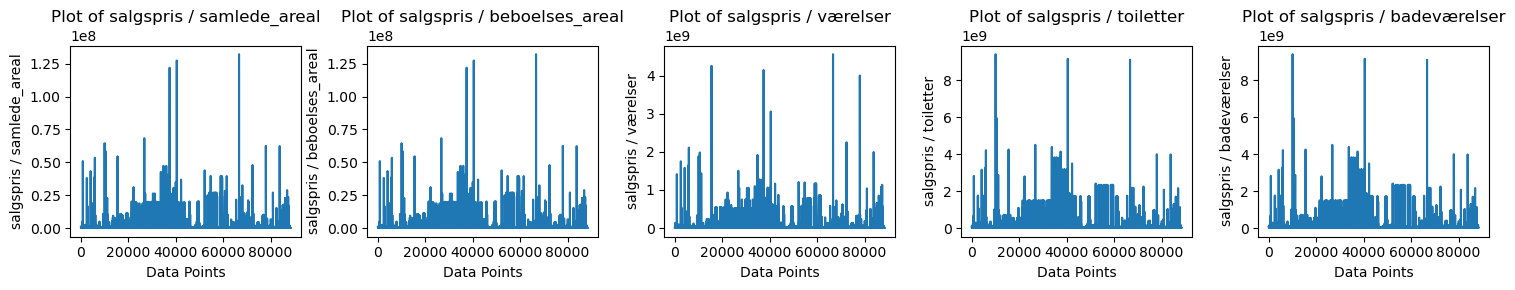

In [16]:
# Create subplots for each numeric column
num_plots = len(numeric_columns)
fig, axs = plt.subplots(1, num_plots, figsize=(num_plots * 3, 3))

# Loop through each numeric column, perform the division, and plot the data
for i, column in enumerate(numeric_columns):
    # Perform the division of 'vurdering' by the current column using NumPy arrays
    division_result = housing_delimited['salgspris'] / housing_delimited[column]
    
    # Plot the values in the corresponding subplot
    axs[i].plot(division_result)
    
    # Add labels and title for the subplot
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel(f'salgspris / {column}')
    axs[i].set_title(f'Plot of salgspris / {column}')

# Adjust the layout to prevent overlapping labels and titles
plt.tight_layout()

# Display all the plots
plt.show()

<Axes: xlabel='koordinat_længde', ylabel='koordinat_bredde'>

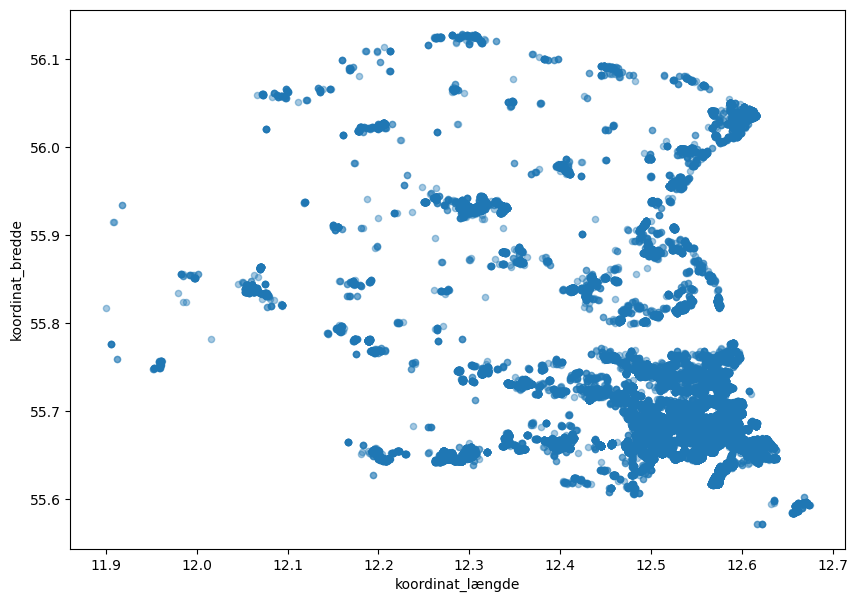

In [15]:
# Create a new column 'salgspris_per_areal' by dividing 'salgspris' by 'samlede_areal'
housing_data.plot(kind='scatter', x='koordinat_længde', y='koordinat_bredde', alpha=0.4, figsize=(10,7))